Nama  : Yulian Aznal Hakiky

Kelas : Visioner

## 1. Import Library

In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Import Dataset

In [259]:
df = pd.read_csv('file/Market_Basket_Optimisation.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data diatas terdiri dari 7501 baris dan 20 kolom, yang berarti transaksi mencapai 7501 kali

## 3. Data Preparation

menggabungkan semua data

In [261]:
all_data = df[0]
for i in range(1,20): 
  all_data = all_data.append(df[i],ignore_index = True)
all_data = pd.DataFrame(all_data.dropna())
all_data = all_data.rename(columns={0:"Item"})
all_data

,Item
0,shrimp
1,burgers
2,chutney
3,turkey
4,mineral water
...,...
129140,protein bar
135018,spinach
136129,mayonnaise
136138,cereals


Mendapatkan nilai unik

In [262]:
print('Unique Items: ', all_data['Item'].nunique())
print( '\n', all_data['Item'].unique())

Unique Items:  120

 ['shrimp' 'burgers' 'chutney' 'turkey' 'mineral water' 'low fat yogurt'
 'whole wheat pasta' 'soup' 'frozen vegetables' 'french fries' 'eggs'
 'cookies' 'spaghetti' 'meatballs' 'red wine' 'rice' 'parmesan cheese'
 'ground beef' 'sparkling water' 'herb & pepper' 'pickles' 'energy bar'
 'fresh tuna' 'escalope' 'avocado' 'tomato sauce' 'clothes accessories'
 'energy drink' 'chocolate' 'grated cheese' 'yogurt cake' 'mint'
 'asparagus' 'champagne' 'ham' 'muffins' 'french wine' 'chicken' 'pasta'
 'tomatoes' 'pancakes' 'frozen smoothie' 'carrots' 'yams' 'shallot'
 'butter' 'light mayo' 'pepper' 'candy bars' 'cooking oil' 'milk'
 'green tea' 'bug spray' 'oil' 'olive oil' 'salmon' 'cake' 'almonds'
 'salt' 'strong cheese' 'hot dogs' 'pet food' 'whole wheat rice'
 'antioxydant juice' 'honey' 'sandwich' 'salad' 'magazines' 'protein bar'
 'mayonnaise' 'cider' 'burger sauce' 'green grapes' 'vegetables mix'
 'bramble' 'nonfat milk' 'tomato juice' 'green beans' 'strawberries'
 'eg

## 4. Visualisasi dan Memahami Data 

In [263]:
# Mencetak 20 data penjualan item terbanyak
most_sold = all_data['Item'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1230
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
burgers               654
cake                  608
cookies               603
escalope              595
low fat yogurt        574
shrimp                536
tomatoes              513
olive oil             494
frozen smoothie       475
turkey                469
Name: Item, dtype: int64


Text(0.5, 1.0, 'Items Most Sold')

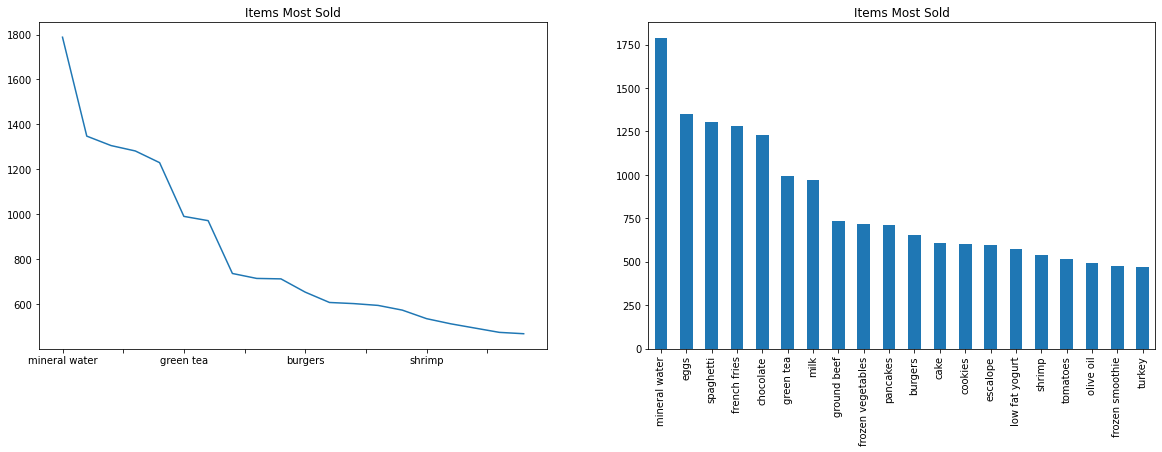

In [264]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

### Kesimpulan
Dari grafik diatas terlihat bahwa produk yang paling sering dibeli yaitu Mineral Water

## 5. Market Basket Analysis 

In [265]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

### Preparasi data

In [266]:
#replacing empty value with 0.
df.fillna(0,inplace=True)

mengubah dataset menjadi list

In [267]:
transaction_list = []
for i in range(0,len(df)):
    transaction_list.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [268]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [269]:
df2

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [270]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
result = metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

Menampilkan 30 data teratas 

In [272]:
result.head(30)

,antecedents,consequents,support,confidence,lift
214,(herb & pepper),(ground beef),0.015998,0.323450,3.291994
215,(ground beef),(herb & pepper),0.015998,0.162822,3.291994
382,"(mineral water, spaghetti)",(ground beef),0.017064,0.285714,2.907928
387,(ground beef),"(mineral water, spaghetti)",0.017064,0.173677,2.907928
398,(olive oil),"(mineral water, spaghetti)",0.010265,0.155870,2.609786
395,"(mineral water, spaghetti)",(olive oil),0.010265,0.171875,2.609786
193,(tomatoes),(frozen vegetables),0.016131,0.235867,2.474464
192,(frozen vegetables),(tomatoes),0.016131,0.169231,2.474464
189,(shrimp),(frozen vegetables),0.016664,0.233209,2.446574
188,(frozen vegetables),(shrimp),0.016664,0.174825,2.446574


### Kesimpulan
* dari data diatas, semakin tinggi nilai lift, korelasi antar item akan semakin kuat.
* data menunjukan bahwa produk yang paling popular yaitu mineral water.
* korelasi item yang populer selain mineral water (format: antecedant(s) -> consequent):

    - herb & pepper -> ground beef
            
    - tomatoes -> frozen vegetables

    - shrimp -> frozen vegetables

    - soup -> milk

    - tomatoes -> shrimp

    - spaghetti -> ground beef
